In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r"/college_event_feedback_original.xlsx",)
df.head()

,Student_ID,Student_Name,Department,Year,Event_Name,Feedback,Rating,Suggestions,Overall_Experience
0,S001,Aarav Mehta,CSE,1st,Tech Fest,The event was very well organized and exciting!,5,NaN,Excellent
1,S002,Priya Sharma,ECE,2nd,Cultural Night,"Loved the performances, it was a memorable night.",4,Include more food stalls,Very Good
2,S003,Rohan Verma,Mechanical,3rd,Sports Day,Sports events were fun but could have been mor...,3,Better time management,Good
3,S004,Sneha Patel,CSE,1st,Tech Fest,"Amazing tech talks and workshops, learned a lot.",5,More coding events,Excellent
4,S005,Vikas Singh,IT,2nd,Hackathon,Hackathon was intense but a great experience o...,4,Provide rest areas,Very Good


# **Data Visualization**

In [4]:
df['Department'].unique()

array(['CSE', 'ECE', 'Mechanical', 'IT', 'Civil'], dtype=object)

In [6]:
df_group = df.groupby('Rating')['Event_Name']

/tmp/ipython-input-3872944024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Event_Name", y="Rating", data=df, palette="coolwarm", estimator="mean")


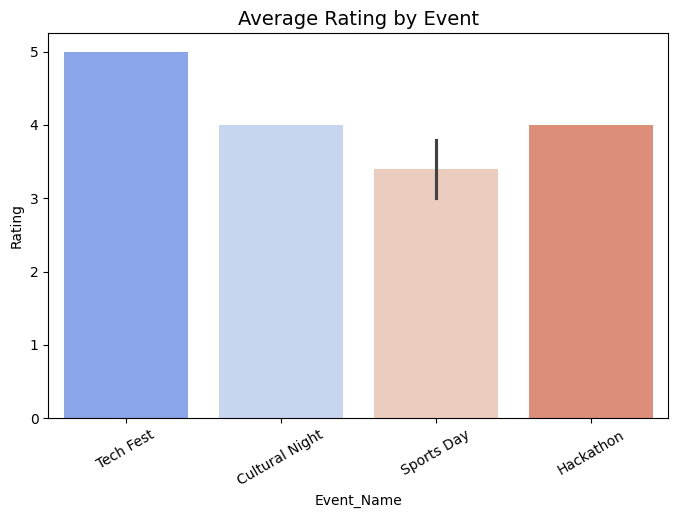

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x="Event_Name", y="Rating", data=df, palette="coolwarm", estimator="mean")
plt.title("Average Rating by Event", fontsize=14)
plt.xticks(rotation=30)
plt.show()

In [11]:
from wordcloud import WordCloud

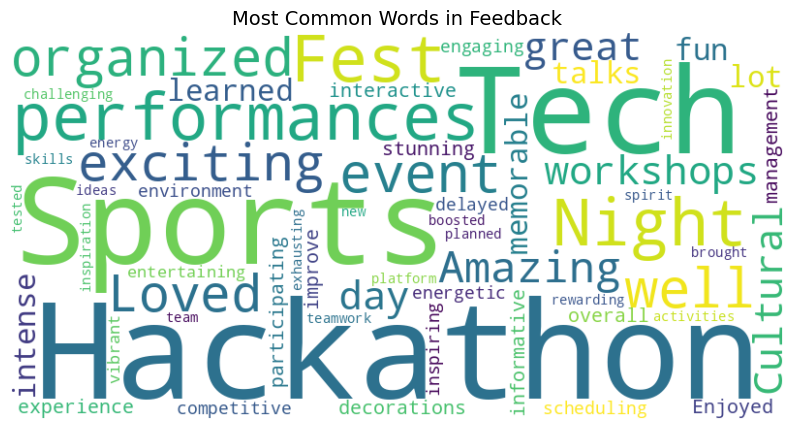

In [12]:
text = " ".join(df["Feedback"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Feedback", fontsize=14)
plt.show()

/tmp/ipython-input-2298495241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Department", data=df, palette="magma")


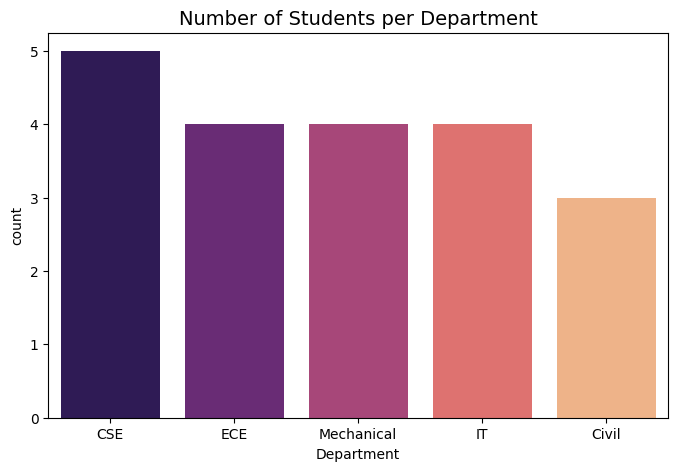

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="Department", data=df, palette="magma")
plt.title("Number of Students per Department", fontsize=14)
plt.show()

/tmp/ipython-input-1298866674.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Event_Name", data=event_ratings, palette="viridis")


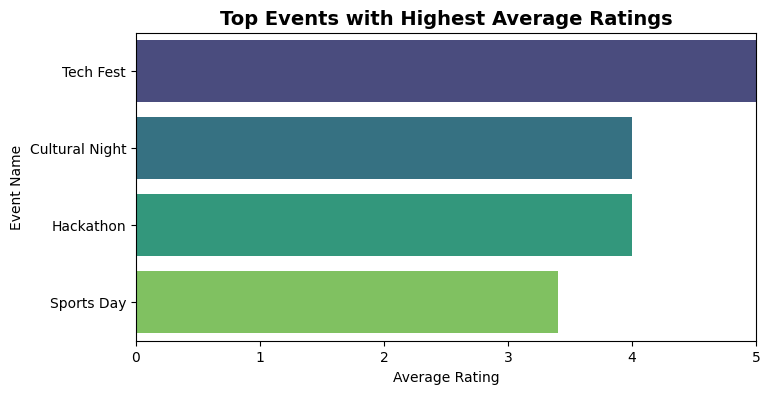

In [16]:
event_ratings = df.groupby("Event_Name")["Rating"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="Rating", y="Event_Name", data=event_ratings, palette="viridis")
plt.title("Top Events with Highest Average Ratings", fontsize=14, weight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Event Name")
plt.xlim(0,5)
plt.show()

/tmp/ipython-input-3571007296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rating", y="Department", data=dept_ratings, palette="coolwarm")


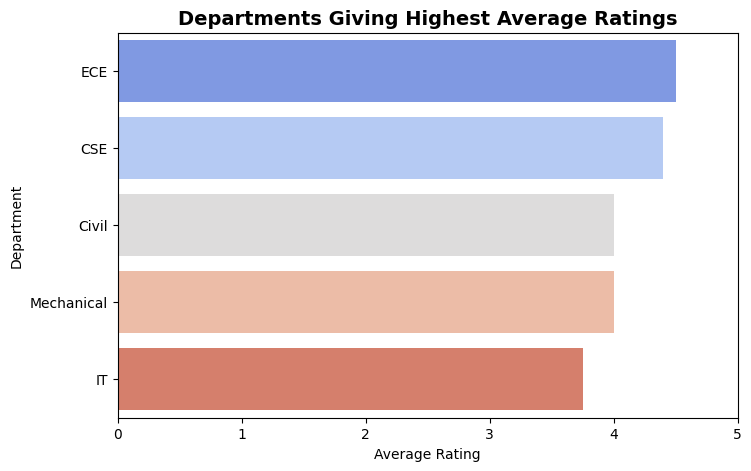

In [17]:
dept_ratings = df.groupby("Department")["Rating"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Rating", y="Department", data=dept_ratings, palette="coolwarm")
plt.title("Departments Giving Highest Average Ratings", fontsize=14, weight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Department")
plt.xlim(0,5)
plt.show()

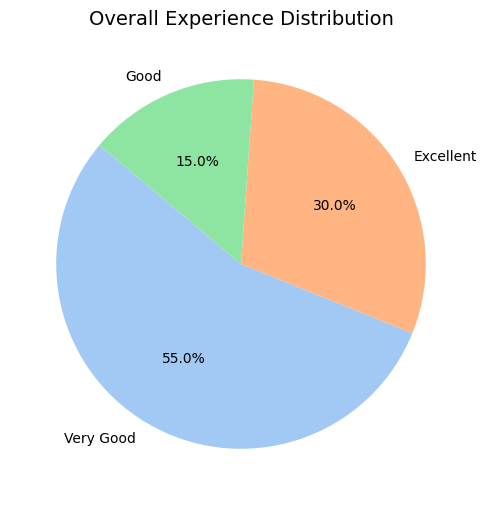

In [18]:
plt.figure(figsize=(6,6))
df["Overall_Experience"].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Overall Experience Distribution", fontsize=14)
plt.ylabel("")
plt.show()

# **Sentiment Analysis Using TextBlob**

In [20]:
from textblob import TextBlob

In [21]:
df["Polarity"] = df["Feedback"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Label"] = df["Polarity"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

/tmp/ipython-input-1262071787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment_Label", data=df, palette="Set2")


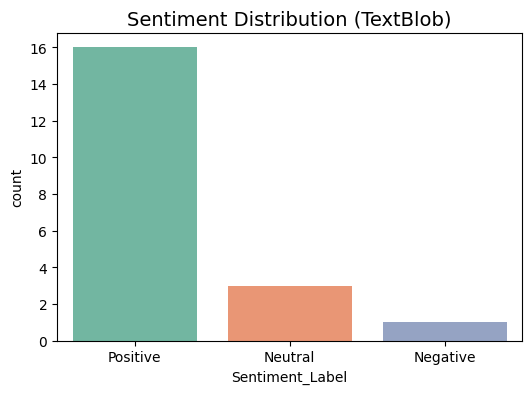

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment_Label", data=df, palette="Set2")
plt.title("Sentiment Distribution (TextBlob)", fontsize=14)
plt.show()

# **Sentiment Analysis Using Vader**

In [35]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
sia = SentimentIntensityAnalyzer()
df["VADER_Sentiment"] = df["Feedback"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [38]:
def get_vader_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["VADER_Label"] = df["VADER_Sentiment"].apply(get_vader_label)

/tmp/ipython-input-541943903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="VADER_Label", data=df, palette="Set2")


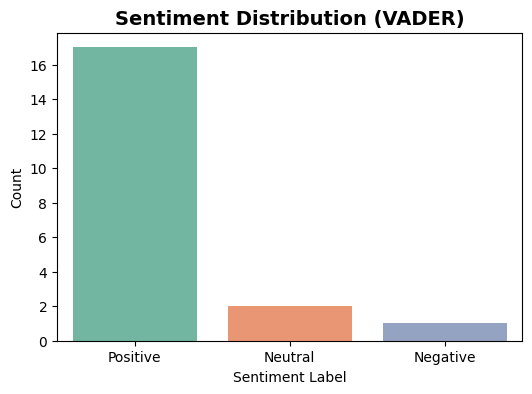

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x="VADER_Label", data=df, palette="Set2")
plt.title("Sentiment Distribution (VADER)", fontsize=14, weight="bold")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

In [40]:
df_new = df

In [41]:
df_new

,Student_ID,Student_Name,Department,Year,Event_Name,Feedback,Rating,Suggestions,Overall_Experience,Polarity,Sentiment_Label,VADER_Sentiment,VADER_Label
0,S001,Aarav Mehta,CSE,1st,Tech Fest,The event was very well organized and exciting!,5,NaN,Excellent,0.287500,Positive,0.7082,Positive
1,S002,Priya Sharma,ECE,2nd,Cultural Night,"Loved the performances, it was a memorable night.",4,Include more food stalls,Very Good,0.600000,Positive,0.5994,Positive
2,S003,Rohan Verma,Mechanical,3rd,Sports Day,Sports events were fun but could have been mor...,3,Better time management,Good,0.400000,Positive,0.2846,Positive
3,S004,Sneha Patel,CSE,1st,Tech Fest,"Amazing tech talks and workshops, learned a lot.",5,More coding events,Excellent,0.600000,Positive,0.5859,Positive
4,S005,Vikas Singh,IT,2nd,Hackathon,Hackathon was intense but a great experience o...,4,Provide rest areas,Very Good,0.333333,Positive,0.7783,Positive
5,S006,Neha Gupta,Civil,3rd,Cultural Night,The decorations and performances were stunning.,4,More seating arrangement,Very Good,0.500000,Positive,0.3818,Positive
6,S007,Arjun Rao,CSE,1st,Sports Day,"Enjoyed participating, but management could im...",3,Improve scheduling,Good,0.500000,Positive,0.7184,Positive
7,S008,Isha Malhotra,ECE,2nd,Tech Fest,Workshops were informative and interactive.,5,Add advanced topics,Excellent,0.000000,Neutral,0.0000,Neutral
8,S009,Kunal Thakur,Mechanical,3rd,Hackathon,Loved the competitive environment at the hacka...,4,Extend duration,Very Good,0.700000,Positive,0.6808,Positive
9,S010,Ritika Jain,IT,1st,Sports Day,Sports day was energetic but scheduling was de...,3,Organize events on time,Good,0.500000,Positive,-0.1027,Negative


In [51]:
!pip install openpyxl


In [54]:
df_new.to_excel('Raw_Data', index =False, engine = 'openpyxl')

In [55]:
from google.colab import files
files.download("Raw_Data")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df